# **Final Project :2025S**

## Advanced Python AI and ML Tools

### Predictive Model Development with Modern Datasets and Visual Analytics

Data Source: https://survey.stackoverflow.co/
Stack Overflow Developer Survey (2023)

In May 2023 over 90,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
df_stack_overflow_2023 = pd.read_csv('survey_results_public.csv')

In [ ]:
print("Shape of dataset:", df_stack_overflow_2023.shape)
df_stack_overflow_2023.head()

Shape of dataset: (89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
#Calculate missing percentages for all columns
missing_percent = df_stack_overflow_2023.isnull().mean() * 100

#Filter to show only columns with >= 50% missing
missing_50plus = missing_percent[missing_percent >= 50].sort_values(ascending=False)

#Create DataFrame
missing_df = pd.DataFrame({
    'Column': missing_50plus.index,
    'MissingPercent': missing_50plus.values
})

#Format the percentages
missing_df['MissingPercent'] = missing_df['MissingPercent'].map('{:.2f}%'.format)

#Display results
print("Columns with 50% or more missing values:")
print(missing_df)


Columns with 50% or more missing values:
                                 Column MissingPercent
0                    AINextVery similar         97.06%
1                AINextSomewhat similar         93.01%
2   AINextNeither different nor similar         92.60%
3                  AINextVery different         85.80%
4                   AIDevWantToWorkWith         78.04%
5         AIToolNot interested in Using         76.38%
6              AINextSomewhat different         73.87%
7                   AIDevHaveWorkedWith         70.95%
8             AIToolInterested in Using         63.24%
9                 AIToolCurrently Using         59.48%
10                             Industry         58.77%
11                 LearnCodeCoursesCert         58.43%
12                                AIAcc         56.73%
13                          Frequency_3         53.97%
14                          Knowledge_8         53.57%
15                          Knowledge_7         53.50%
16                      

In [ ]:
# Drop columns with > 70% because of too many missing data for those columns
cols_to_drop_70plus = missing_percent[missing_percent >= 70].index
df_stack_overflow_2023.drop(columns=cols_to_drop_70plus, inplace=True)

print(f"\n dropped {len(cols_to_drop_70plus)} columns with ≥ 70% missing values, new shape of cleaned dataset:{df_stack_overflow_2023.shape}")



 dropped 8 columns with ≥ 70% missing values, new shape of cleaned dataset:(89184, 76)


In [ ]:
no_nulls = df_stack_overflow_2023.columns[df_stack_overflow_2023.isnull().mean() == 0]

print("columns with no missing values:", no_nulls.tolist())

columns with no missing values: ['ResponseId', 'Q120', 'MainBranch', 'Age']


In [ ]:
irrelevant_cols = [
    'ResponseId', 'Q120', 'MainBranch', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq',
    'SOComm', 'SOAI', 'SurveyLength', 'SurveyEase','ConvertedCompYearly','PurchaseInfluence','TechList'
]

# Drop only the ones that exist in the DataFrame to avoid errors
df_stack_overflow_2023 = df_stack_overflow_2023.drop(
    columns=[col for col in irrelevant_cols if col in df_stack_overflow_2023.columns]
)

print(f"dropped {len(irrelevant_cols)} irrelevant columns, new shape of dataset: {df_stack_overflow_2023.shape}")

dropped 14 irrelevant columns, new shape of dataset: (89184, 62)


### Reasons for dropping irrelevant or low value columns

ResponseId	- Unique identifier, not useful for analysis or modeling.

MainBranch -	Nearly everyone answers the same (e.g. “I am a developer…”), so low variance.

NEWSOSites, SOVisitFreq, SOAccount, SOPartFreq, SOComm and SOAI - specific to Stack Overflow community behavior — only relevant for Stack Overflow usage studies.

ConvertedCompYearly - redundant feature with "CompTotal"

PurchaseInfluence - not relevant for the analysis

In [ ]:
# Check for duplicate column names in the DataFrame
duplicate_cols = df_stack_overflow_2023.columns[df_stack_overflow_2023.columns.duplicated()].tolist()

if duplicate_cols:
    print(f"Detected {len(duplicate_cols)} duplicate column(s):")
    for col in duplicate_cols:
        print(f"  - {col}")
else:
    print("No duplicate columns found in the dataset.")



No duplicate columns found in the dataset.


In [ ]:
# first fill categoricals…
categorical_columns = df_stack_overflow_2023.select_dtypes(include='object').columns
df_stack_overflow_2023[categorical_columns] = df_stack_overflow_2023[categorical_columns].fillna("NA")

# then count BOTH real NaNs and the 'NA' string placeholders
df_stack_overflow_2023['Count of NA'] = (
    df_stack_overflow_2023.isnull().sum(axis=1)          # numeric NaNs
    + (df_stack_overflow_2023[categorical_columns] == 'NA').sum(axis=1)  # placeholder NAs
)

df_stack_overflow_2023.head()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,Count of NA
0,18-24 years old,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,61
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NA,27,23,...,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",15
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NA,12,7,...,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NA,11
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,Strongly agree,Agree,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,2


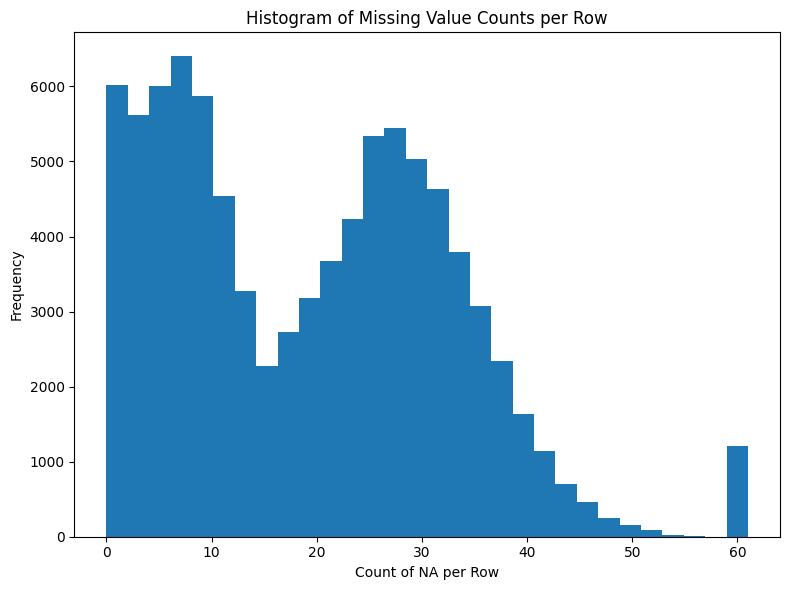

In [ ]:
# Plot histogram of the "Count of NA" column
plt.figure(figsize=(8, 6))
plt.hist(df_stack_overflow_2023['Count of NA'], bins=30)
plt.xlabel('Count of NA per Row')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Value Counts per Row')
plt.tight_layout()
plt.show()


In [ ]:
# Drop row where count of missing values => 40
df_stack_overflow_filtered = df_stack_overflow_2023[df_stack_overflow_2023['Count of NA'] <= 40].copy()
df_stack_overflow_filtered.shape

(85139, 63)

In [ ]:
df_stack_overflow_filtered.dtypes

,0
Age,object
Employment,object
RemoteWork,object
CodingActivities,object
EdLevel,object
...,...
TimeSearching,object
TimeAnswering,object
ProfessionalTech,object
Industry,object


In [ ]:
#Display summary statistics for all numeric columns
numerical_summary = df_stack_overflow_filtered.select_dtypes(include=['number']).describe()

# Show the result
print("Summary statistics for numerical columns:")
display(numerical_summary)


Summary statistics for numerical columns:


,CompTotal,WorkExp,Count of NA
count,4.815400e+04,43547.000000,85139.000000
mean,2.076714e+16,11.407835,18.233559
std,4.557050e+18,9.053575,11.482491
min,0.000000e+00,0.000000,0.000000
25%,6.300000e+04,5.000000,8.000000
50%,1.150000e+05,9.000000,18.000000
75%,2.300000e+05,16.000000,28.000000
max,1.000000e+21,50.000000,40.000000


In [ ]:
# Identify numerical columns
numerical_columns = df_stack_overflow_filtered.select_dtypes(include=['number']).columns

# Count missing values in numerical columns
missing_numerical = df_stack_overflow_filtered[numerical_columns].isnull().sum()

# Filter to show only columns with missing values
missing_numerical = missing_numerical[missing_numerical > 0]

# Display results
if not missing_numerical.empty:
    print("Missing values in numerical columns:")
    print(missing_numerical.sort_values(ascending=False))
else:
    print("No missing values in numerical columns.")

missing_numerical_percent = (df_stack_overflow_filtered[numerical_columns].isnull().mean() * 100).round(2)

# Combine count and percent into one DataFrame
missing_numerical_summary = pd.DataFrame({
    'MissingCount': missing_numerical,
    'MissingPercent': missing_numerical_percent[missing_numerical.index]
})

print("Missing values in numerical columns (with percentage):")
print(missing_numerical_summary)



Missing values in numerical columns:
WorkExp      41592
CompTotal    36985
dtype: int64
Missing values in numerical columns (with percentage):
           MissingCount  MissingPercent
CompTotal         36985           43.44
WorkExp           41592           48.85


### Top 15 Countries of Respondents

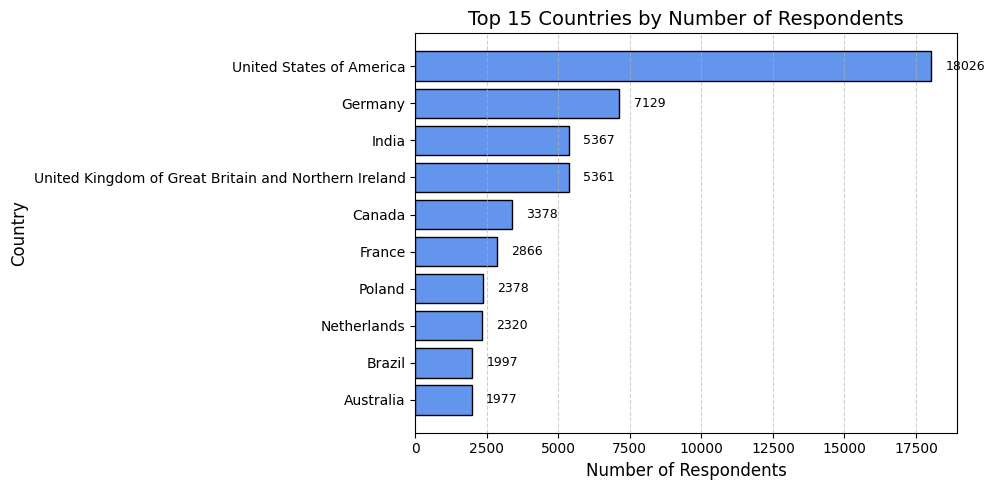

In [ ]:
# Get the top 15 countries
country_counts = df_stack_overflow_filtered['Country'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(country_counts.index, country_counts.values, color='cornflowerblue', edgecolor='black')

# Add counts to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height() / 2, str(width),
             va='center', fontsize=9)

# Step 3: Customize the plot
plt.title('Top 15 Countries by Number of Respondents', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# To create a salary prediction for country = United States of America
# Filter for rows where Country is "United States of America"
df_stack_overflow_filtered_usa = df_stack_overflow_filtered[
    df_stack_overflow_filtered['Country'] == 'United States of America'
].copy()

df_stack_overflow_filtered_usa.shape

(18026, 63)

### Standardize the Salary to USD currency

In [ ]:
import pandas as pd

# Step 1: Load the currency rates CSV
rates_df = pd.read_csv('/content/currency-rates.csv')

# Step 2: Extract first 3 characters from Currency column
df_stack_overflow_filtered_usa['Currency_Code'] = df_stack_overflow_filtered_usa['Currency'].astype(str).str[:3]

# Step 3: Merge Rate_to_USD into df_stack_overflow_2023 based on Currency_Code
df_stack_overflow_filtered_usa = pd.merge(
    df_stack_overflow_filtered_usa,
    rates_df[['Currency_Code', 'Rate_to_USD']],
    on='Currency_Code',
    how='left'
)

# Step 4: Compute CompTotalUSD = CompTotal / Rate_to_USD
df_stack_overflow_filtered_usa['CompTotalUSD'] = df_stack_overflow_filtered_usa.apply(
    lambda row: row['CompTotal'] / row['Rate_to_USD']
    if pd.notna(row['CompTotal']) and pd.notna(row['Rate_to_USD']) and row['Rate_to_USD'] != 0 else None,
    axis=1
)

# Optional: Preview result
df_stack_overflow_filtered_usa[['Currency', 'Currency_Code', 'CompTotal', 'Rate_to_USD', 'CompTotalUSD']].head()



,Currency,Currency_Code,CompTotal,Rate_to_USD,CompTotalUSD
0,USD\tUnited States dollar,USD,285000.0,1.0,285000.0
1,USD\tUnited States dollar,USD,250000.0,1.0,250000.0
2,USD\tUnited States dollar,USD,156000.0,1.0,156000.0
3,USD\tUnited States dollar,USD,135000.0,1.0,135000.0
4,USD\tUnited States dollar,USD,80000.0,1.0,80000.0


In [ ]:
# Extract the first 3 characters as currency code
df_stack_overflow_filtered_usa['Currency_Code'] = (
    df_stack_overflow_filtered_usa['Currency']
    .astype(str)
    .str[:3]
)

# Create a summary of all unique Currency → Currency_Code mappings
currency_map = (
    df_stack_overflow_filtered_usa[['Currency', 'Currency_Code']]
    .drop_duplicates()
    .sort_values('Currency_Code')
    .reset_index(drop=True)
)

# Display the full list
#print("Unique currencies in the USA subset:")
#print(currency_map)

# (Optional) If you also want counts per code:
counts = (
    df_stack_overflow_filtered_usa['Currency_Code']
    .value_counts()
    .rename_axis('Currency_Code')
    .reset_index(name='Count')
)
print("\nCounts per Currency_Code:")
print(counts)



Counts per Currency_Code:
   Currency_Code  Count
0            USD  14510
1             NA   3485
2            CAD      4
3            AED      3
4            UGX      3
5            AUD      3
6            GBP      2
7            EUR      2
8            CRC      2
9            UZS      1
10           BGN      1
11           SAR      1
12           GHS      1
13           BAM      1
14           AMD      1
15           MYR      1
16           INR      1
17           TWD      1
18           HKD      1
19           CNY      1
20           JPY      1


### For CompTotalUSD

Do NOT use mean, compensation is often extremely skewed (some devs make $1M+, others <$20k). Instead, use median salary per role by country to fill the missing values.


In [ ]:
comp_column = 'CompTotalUSD'

# Fill missing CompTotal using median by DevType and Country
df_stack_overflow_filtered_usa[comp_column] = df_stack_overflow_filtered_usa.groupby(
    ['DevType', 'Country']
)[comp_column].transform(lambda group: group.fillna(group.median()))

# Fill remaining missing values with overall median
overall_median_comp = df_stack_overflow_filtered_usa[comp_column].median()
df_stack_overflow_filtered_usa[comp_column] = df_stack_overflow_filtered_usa[comp_column].fillna(overall_median_comp)

missing_remaining = df_stack_overflow_filtered_usa[comp_column].isnull().sum()
print(f"Missing values in '{comp_column}' after filling: {missing_remaining}")

Missing values in 'CompTotalUSD' after filling: 0


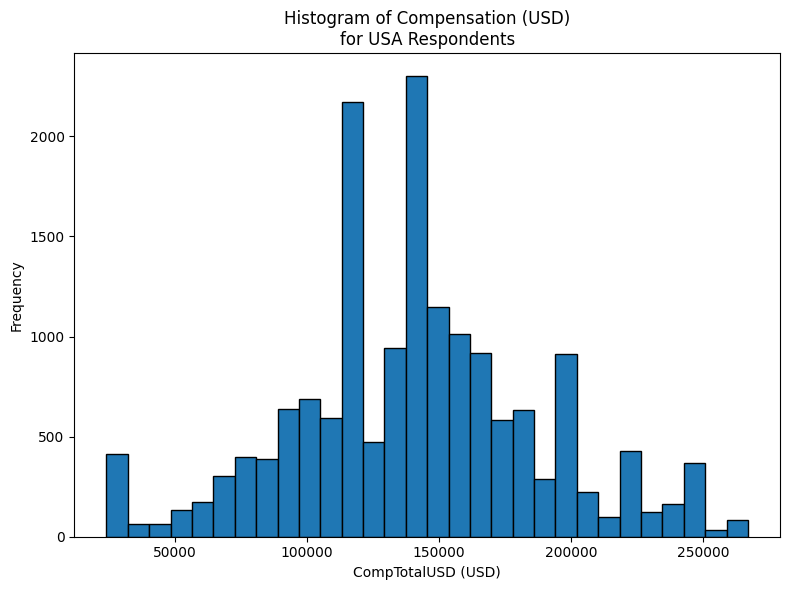

Descriptive Statistics (IQR‑filtered CompTotalUSD):
                count           mean           std      min       25%  \
CompTotalUSD  16765.0  140664.818331  46922.455515  24000.0  115000.0   

                   50%       75%       max  
CompTotalUSD  140000.0  165000.0  267000.0  

Skewness : 0.123
Kurtosis : 0.130


In [ ]:
# 1) Convert to numeric and drop missing
comp_usd = pd.to_numeric(
    df_stack_overflow_filtered_usa['CompTotalUSD'],
    errors='coerce'
).dropna()

# 2) Compute IQR and filter out outliers
q1, q3 = comp_usd.quantile([0.25, 0.75])
iqr     = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
comp_usd_filtered = comp_usd[(comp_usd >= lower) & (comp_usd <= upper)]

# 3) Plot histogram excluding outliers
plt.figure(figsize=(8, 6))
plt.hist(comp_usd_filtered, bins=30, edgecolor='black')
plt.xlabel('CompTotalUSD (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Compensation (USD)\nfor USA Respondents')
plt.tight_layout()
plt.show()

# 4) Print descriptive statistics
stats = comp_usd_filtered.describe()
skew   = comp_usd_filtered.skew()
kurt   = comp_usd_filtered.kurtosis()

print("Descriptive Statistics (IQR‑filtered CompTotalUSD):")
print(stats.to_frame().T)
print(f"\nSkewness : {skew:.3f}")
print(f"Kurtosis : {kurt:.3f}")


In [ ]:
import pandas as pd

# 1) Convert to numeric and drop missing
comp_usd = pd.to_numeric(
    df_stack_overflow_filtered_usa['CompTotalUSD'],
    errors='coerce'
).dropna()

# 2) Compute IQR bounds
q1, q3 = comp_usd.quantile([0.25, 0.75])
iqr     = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

# 3) Filter out outliers
comp_usd_no_out = comp_usd[(comp_usd >= lower) & (comp_usd <= upper)]

# 4) Descriptive statistics
stats = comp_usd_no_out.describe()
skew   = comp_usd_no_out.skew()
kurt   = comp_usd_no_out.kurtosis()

# 5) Output
print("Descriptive Statistics (IQR-filtered CompTotalUSD):")
print(stats)
print(f"\nSkewness : {skew:.3f}")
print(f"Kurtosis : {kurt:.3f}")


Descriptive Statistics (IQR-filtered CompTotalUSD):
count     16765.000000
mean     140664.818331
std       46922.455515
min       24000.000000
25%      115000.000000
50%      140000.000000
75%      165000.000000
max      267000.000000
Name: CompTotalUSD, dtype: float64

Skewness : 0.123
Kurtosis : 0.130


### For WorkExp
Infer as max(YearsCodePro, YearsCode) since both are present, but need to convert YearsCode and YearsCodePro first to numberical values.

In [ ]:
# Step 1: Convert YearsCode and YearsCodePro to numeric
def convert_experience(value):
    if pd.isna(value) or value == "NA":
        return np.nan
    if "Less than" in str(value):
        return 0.5
    if "More than" in str(value):
        return 51.0
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply conversion
df_stack_overflow_filtered_usa['YearsCode'] = df_stack_overflow_filtered_usa['YearsCode'].apply(convert_experience)
df_stack_overflow_filtered_usa['YearsCodePro'] = df_stack_overflow_filtered_usa['YearsCodePro'].apply(convert_experience)

# Step 2: Fill missing values with column median
median_years_code = df_stack_overflow_filtered_usa['YearsCode'].median()
df_stack_overflow_filtered_usa['YearsCode'] = df_stack_overflow_filtered_usa['YearsCode'].fillna(median_years_code)

median_years_code_pro = df_stack_overflow_filtered_usa['YearsCodePro'].median()
df_stack_overflow_filtered_usa['YearsCodePro'] = df_stack_overflow_filtered_usa['YearsCodePro'].fillna(median_years_code_pro)

# Step 3: Use cleaned YearsCode and YearsCodePro to infer WorkExp if missing
def infer_work_exp(row):
    if pd.isna(row['WorkExp']) and pd.notna(row['YearsCode']) and pd.notna(row['YearsCodePro']):
        return max(row['YearsCode'], row['YearsCodePro'])
    return row['WorkExp']

df_stack_overflow_filtered_usa['WorkExp'] = df_stack_overflow_filtered_usa['WorkExp'].apply(convert_experience)
df_stack_overflow_filtered_usa['WorkExp'] = df_stack_overflow_filtered_usa.apply(infer_work_exp, axis=1)

# Step 4: Fill any remaining WorkExp with median
median_work_exp = df_stack_overflow_filtered_usa['WorkExp'].median()
df_stack_overflow_filtered_usa['WorkExp'] = df_stack_overflow_filtered_usa['WorkExp'].fillna(median_work_exp)

# Final check
missing_remaining = df_stack_overflow_filtered_usa[['YearsCode', 'YearsCodePro', 'WorkExp']].isnull().sum()
print("Missing values remaining:")
print(missing_remaining)


Missing values remaining:
YearsCode       0
YearsCodePro    0
WorkExp         0
dtype: int64


### Understanding Age Distribution of the USA Respondents

In [ ]:
df_stack_overflow_filtered_usa.Age.value_counts()

,count
Age,
25-34 years old,6210
35-44 years old,4804
18-24 years old,2324
45-54 years old,2243
55-64 years old,1184
Under 18 years old,722
65 years or older,431
Prefer not to say,108


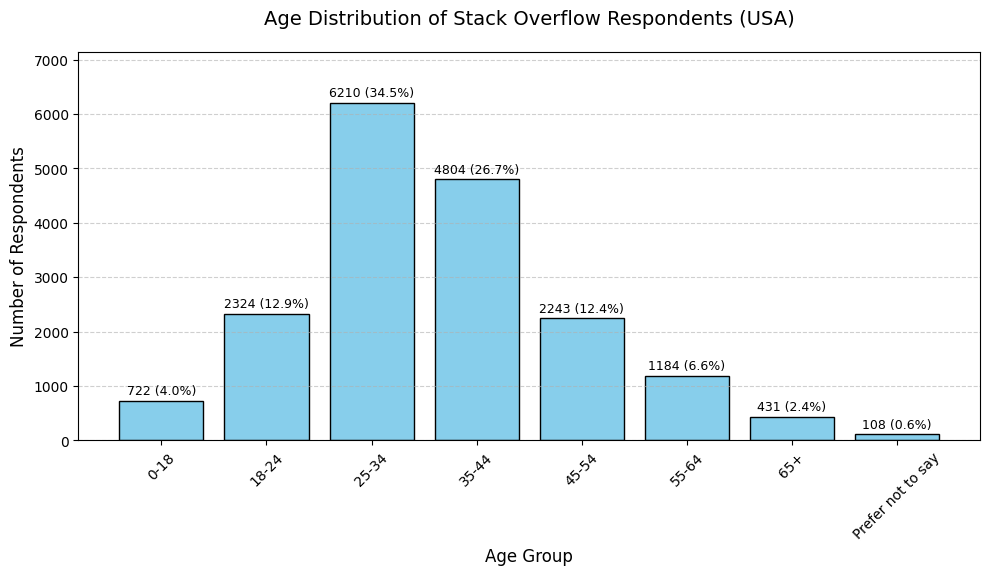

In [ ]:
# Standardize Age categories
df_stack_overflow_filtered_usa['Age'] = df_stack_overflow_filtered_usa['Age'].str.strip()
df_stack_overflow_filtered_usa['Age'] = df_stack_overflow_filtered_usa['Age'].replace({
    'Under 18 years old': '0-18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'Prefer not to say'
})

# Define age group order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']

# Count and reindex
age_counts = (
    df_stack_overflow_filtered_usa['Age']
    .value_counts()
    .reindex(age_order)
    .fillna(0)
    .astype(int)
)
total_respondents = age_counts.sum()
max_count = age_counts.max()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(age_counts.index, age_counts.values,
              color='skyblue', edgecolor='black')

# reserve 15% headroom for annotations
ax.set_ylim(0, max_count * 1.15)

# annotate bars
for bar, count in zip(bars, age_counts.values):
    percent = (count / total_respondents) * 100
    y = bar.get_height() + max_count * 0.01
    ax.text(bar.get_x() + bar.get_width()/2, y,
            f"{count} ({percent:.1f}%)",
            ha='center', va='bottom', fontsize=9)

# titles and labels
ax.set_title('Age Distribution of Stack Overflow Respondents (USA)',
             fontsize=14, pad=20)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)

# rotate the existing x‑tick labels
ax.tick_params(axis='x', labelrotation=45)

ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Working Arrangement (USA Repondents only)

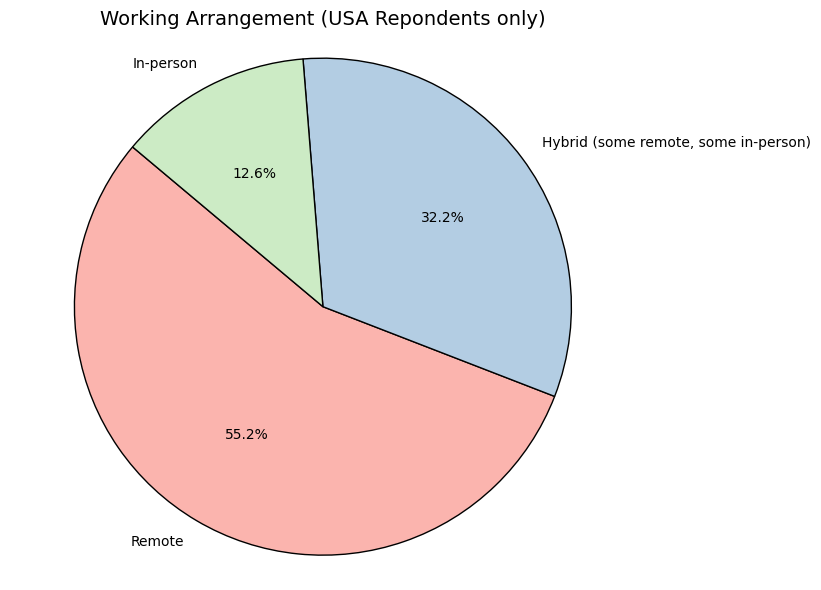

In [ ]:
import matplotlib.pyplot as plt

# Filter out both actual NaN and string "NA"
filtered_df = df_stack_overflow_filtered_usa[
    df_stack_overflow_filtered_usa['RemoteWork'].notna() &
    (df_stack_overflow_filtered_usa['RemoteWork'] != 'NA')
]

# Value counts for pie chart
remote_counts = filtered_df['RemoteWork'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(remote_counts.values,
        labels=remote_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Working Arrangement (USA Repondents only)', fontsize=14)
plt.axis('equal')  # Ensures pie chart is circular
plt.tight_layout()
plt.show()


### Educational Level of Respondents

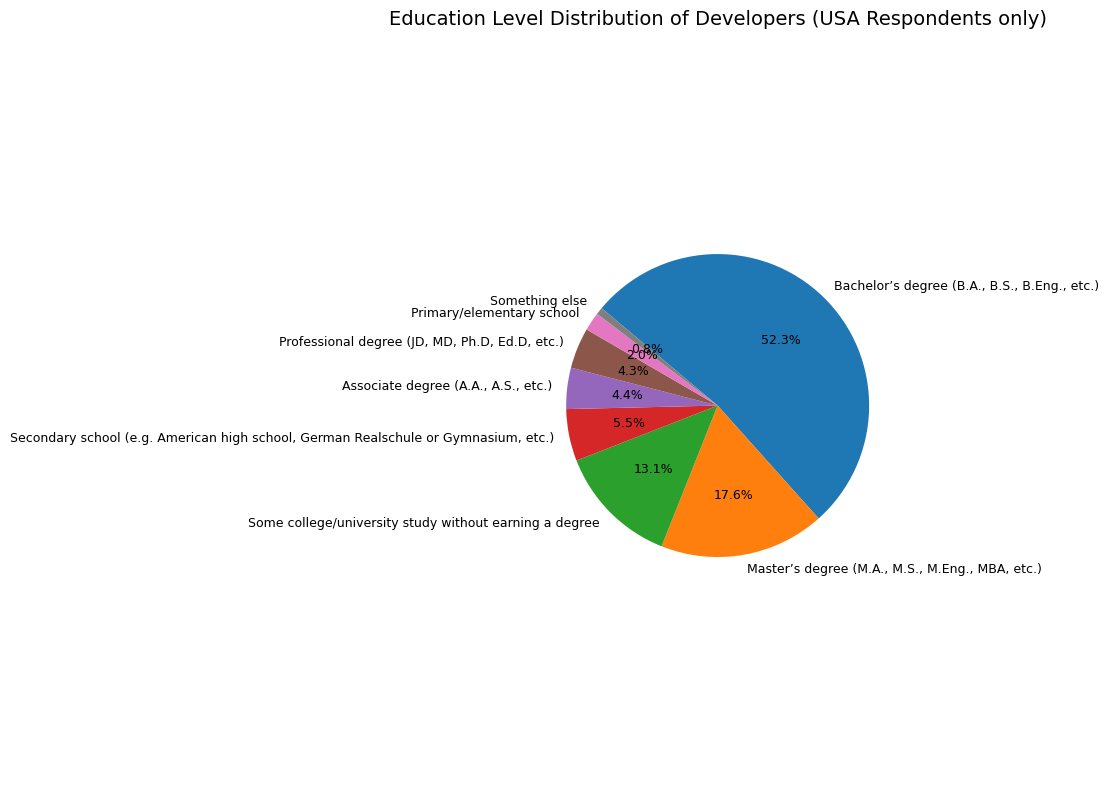

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Clean and prepare EdLevel column
df_stack_overflow_filtered_usa['EdLevel'] = df_stack_overflow_filtered_usa['EdLevel'].astype(str).str.strip()

# Step 2: Count values and filter out missing or irrelevant data
ed_counts = df_stack_overflow_filtered_usa['EdLevel'].value_counts()

# Step 3: Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    ed_counts,
    labels=ed_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    textprops={'fontsize': 9}
)
plt.title('Education Level Distribution of Developers (USA Respondents only)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()


### Understanding the Salary Brackets ( USA Respondents only)

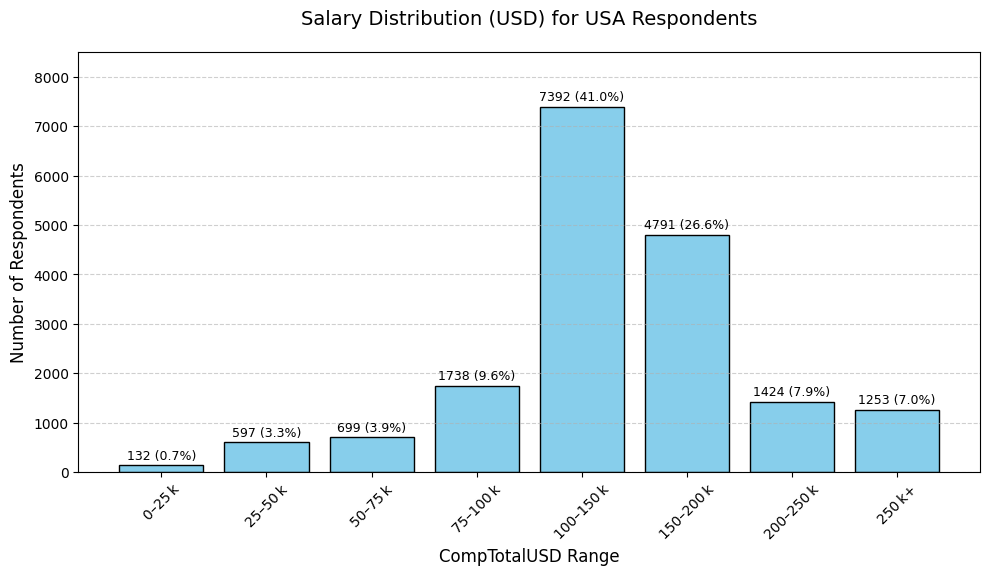

In [ ]:
# 1) Convert CompTotalUSD to numeric and drop missing
comp_usd = pd.to_numeric(
    df_stack_overflow_filtered_usa['CompTotalUSD'],
    errors='coerce'
).dropna()

# 2) Define your salary bins and labels
bins   = [0, 25000, 50000, 75000, 100000, 150000, 200000, 250000, comp_usd.max()]
labels = ['0–25 k', '25–50 k', '50–75 k', '75–100 k', '100–150 k',
          '150–200 k', '200–250 k', '250 k+']

# 3) Bucket the salaries
salary_bucket = pd.cut(comp_usd, bins=bins, labels=labels, include_lowest=True)

# 4) Count & sort
salary_counts = salary_bucket.value_counts().reindex(labels).fillna(0).astype(int)
total = salary_counts.sum()
max_count = salary_counts.max()

# 5) Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, salary_counts.values,
              color='skyblue', edgecolor='black')

# give 15% headroom for annotations
ax.set_ylim(0, max_count * 1.15)

# annotate each bar with count (pct)
for bar, count in zip(bars, salary_counts.values):
    pct = count / total * 100
    y   = bar.get_height() + max_count * 0.01
    ax.text(bar.get_x() + bar.get_width() / 2, y,
            f"{count} ({pct:.1f}%)",
            ha='center', va='bottom', fontsize=9)

# titles & labels
ax.set_title('Salary Distribution (USD) for USA Respondents',
             fontsize=14, pad=20)
ax.set_xlabel('CompTotalUSD Range', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)

# rotate x‑labels, grid and layout
ax.tick_params(axis='x', labelrotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.show()


### Understanding the Salary Distribution by Age Group ( USA Respondents only)

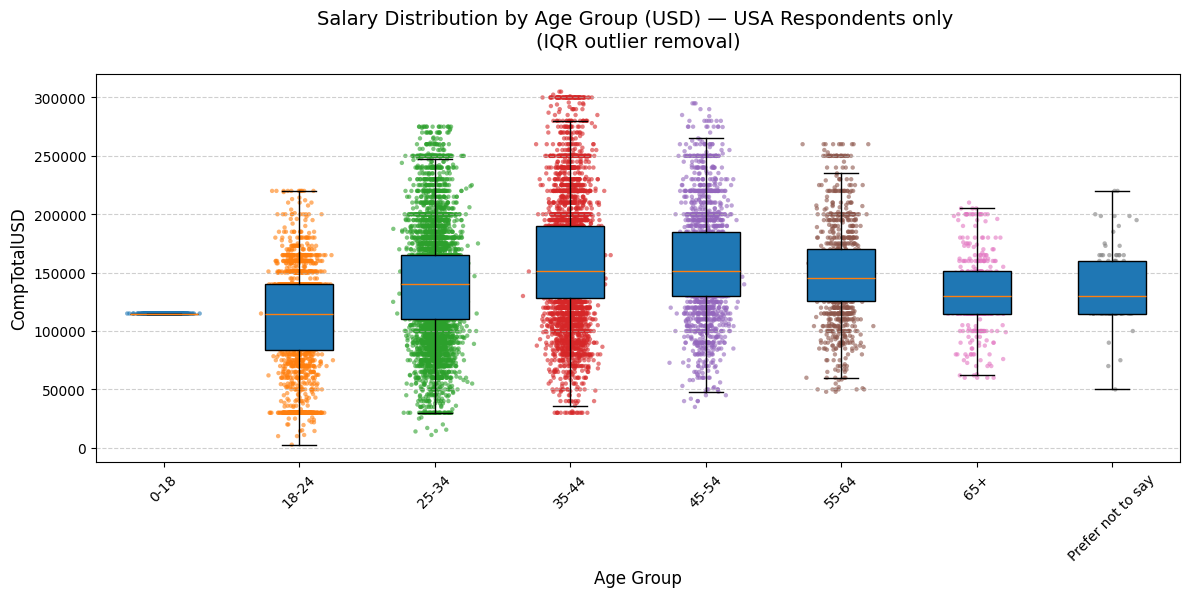

In [ ]:
# 1) Prepare Data
df = df_stack_overflow_filtered_usa.copy()
df['CompTotalUSD'] = pd.to_numeric(df['CompTotalUSD'], errors='coerce')
df = df.dropna(subset=['CompTotalUSD', 'Age'])

age_order = ['0-18','18-24','25-34','35-44','45-54','55-64','65+','Prefer not to say']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 2) Bucket and remove outliers by IQR per age
salary_by_age = []
for age in age_order:
    s = df.loc[df['Age']==age, 'CompTotalUSD']
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    salary_by_age.append(s[(s >= q1 - 1.5*iqr) & (s <= q3 + 1.5*iqr)])

# 3) Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(salary_by_age,
           tick_labels=age_order,
           showfliers=False,
           patch_artist=True)

# overlay jittered points
for i, s in enumerate(salary_by_age, start=1):
    x = np.random.normal(loc=i, scale=0.08, size=len(s))
    ax.scatter(x, s, alpha=0.6, s=10, color=f"C{i-1}", edgecolors='none')

# styling
ax.set_title(
    'Salary Distribution by Age Group (USD) — USA Respondents only \n(IQR outlier removal)',
    fontsize=14, pad=20
)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('CompTotalUSD', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Understanding Job Category (USA Respondents only)

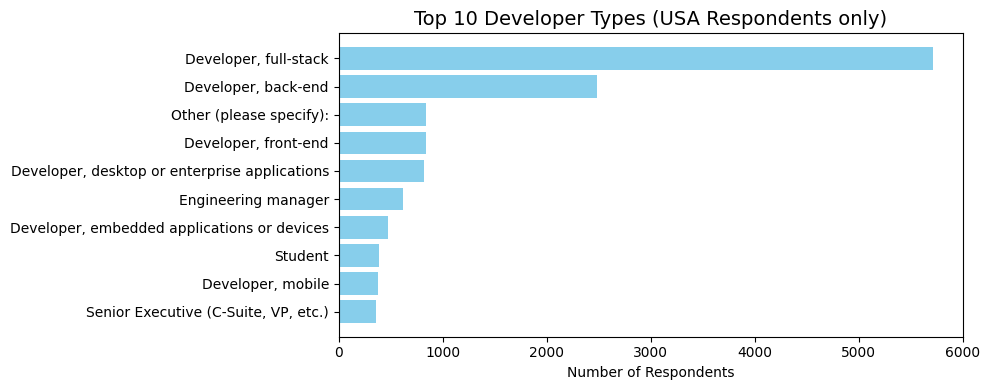

In [ ]:
# Step 1: Filter out NaN and string "NA" from DevType
devtype_series = df_stack_overflow_filtered_usa['DevType']
devtype_cleaned = devtype_series[~devtype_series.isin([None, 'NA'])].dropna().str.split(';')

# Step 2: Flatten the list and count frequency
devtype_counts = Counter([dev.strip() for sublist in devtype_cleaned for dev in sublist])

# Step 3: Convert to DataFrame and get Top 20
devtype_df = pd.DataFrame(devtype_counts.items(), columns=['DevType', 'Count'])
devtype_df = devtype_df.sort_values(by='Count', ascending=False).head(10)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(10, 4))
plt.barh(devtype_df['DevType'], devtype_df['Count'], color='skyblue')
plt.gca().invert_yaxis()  # Highest at the top
plt.title('Top 10 Developer Types (USA Respondents only)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.tight_layout()
plt.show()


### Understanding Years of Coding Experince Distribution

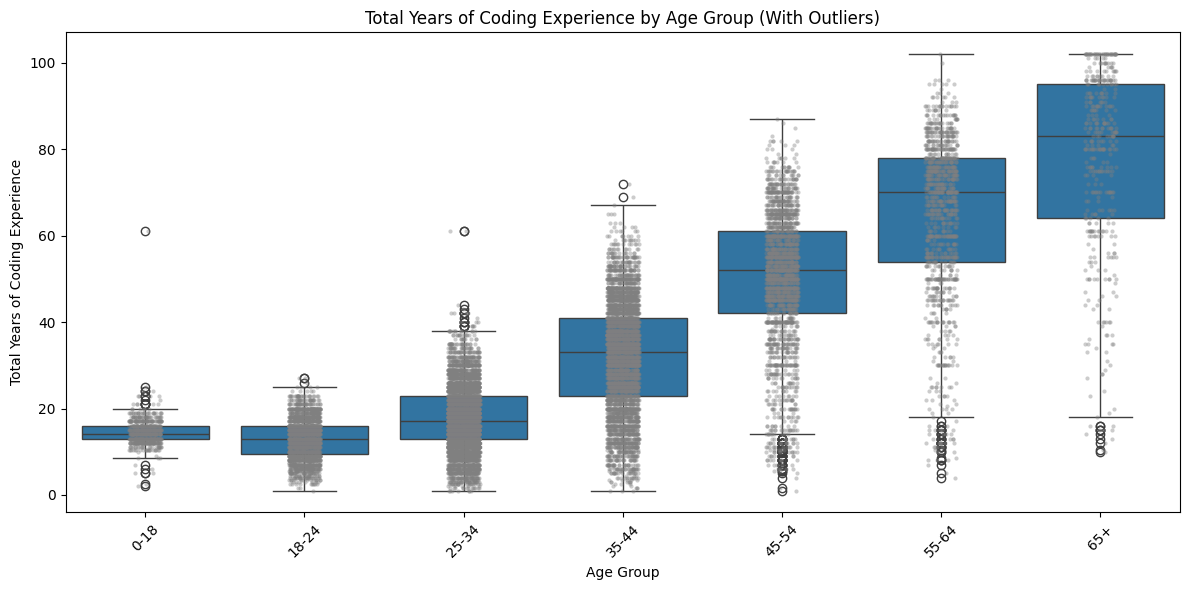

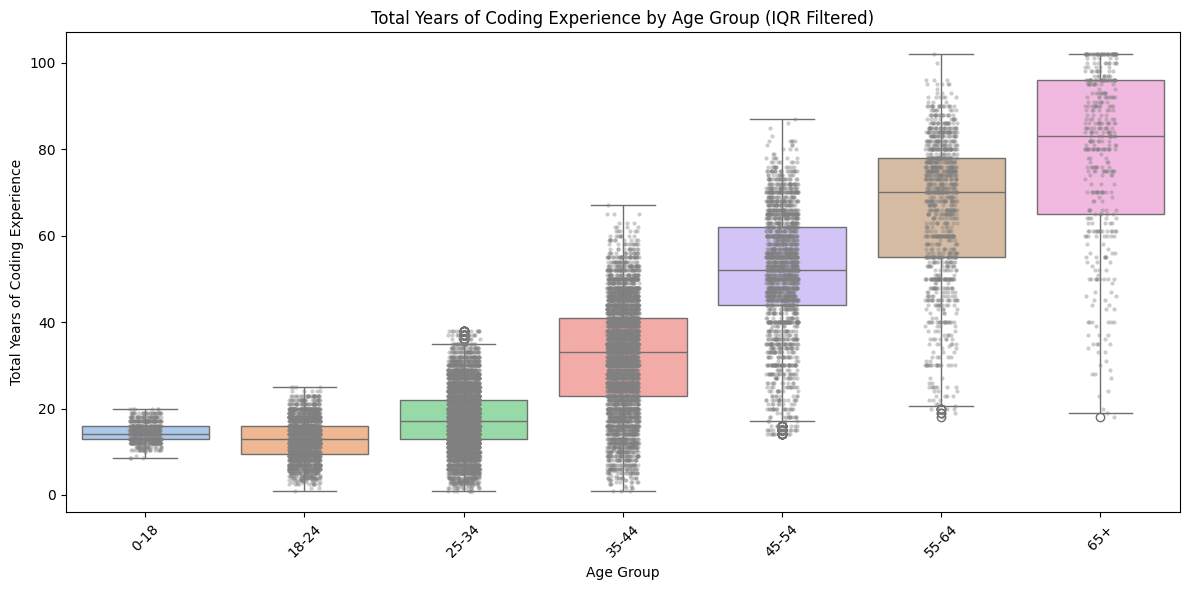

In [ ]:
# Convert experience columns to numeric
df_stack_overflow_filtered_usa['YearsCode'] = pd.to_numeric(df_stack_overflow_filtered_usa['YearsCode'], errors='coerce')
df_stack_overflow_filtered_usa['YearsCodePro'] = pd.to_numeric(df_stack_overflow_filtered_usa['YearsCodePro'], errors='coerce')

# Combine total coding experience
df_stack_overflow_filtered_usa['Total_YearsCode'] = df_stack_overflow_filtered_usa[['YearsCode', 'YearsCodePro']].sum(axis=1, skipna=False)

# Standardize age groups
df_stack_overflow_filtered_usa['Age'] = df_stack_overflow_filtered_usa['Age'].replace({
    'Under 18 years old': '0-18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None,
    'NA': None
}).str.strip()

# Drop missing values
df_viz = df_stack_overflow_filtered_usa.dropna(subset=['Total_YearsCode', 'Age'])

# Define age order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# --- PLOT: With outliers ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viz, x='Age', y='Total_YearsCode', order=age_order)

sns.stripplot(data=df_viz, x='Age', y='Total_YearsCode', order=age_order,
              jitter=True, size=3, color='gray', alpha=0.4)
plt.title('Total Years of Coding Experience by Age Group (With Outliers)')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Remove IQR Outliers ---
def remove_iqr_outliers(group):
    Q1 = group['Total_YearsCode'].quantile(0.25)
    Q3 = group['Total_YearsCode'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Total_YearsCode'] >= lower) & (group['Total_YearsCode'] <= upper)]

# Remove outliers (exclude grouping column inside lambda to avoid deprecation warning)
df_viz_iqr = (
    df_viz.groupby('Age', group_keys=False)
    .apply(remove_iqr_outliers, include_groups=False)
    .assign(Age=lambda df: df_viz.loc[df.index, 'Age'])
)

# --- PLOT: Without outliers ---
plt.figure(figsize=(12, 6))

# Boxplot with pastel color
sns.boxplot(data=df_viz_iqr, x='Age', y='Total_YearsCode', order=age_order,
            hue= 'Age', palette='pastel', dodge=False, legend=False)

# Stripplot with smaller, transparent dots
sns.stripplot(data=df_viz_iqr, x='Age', y='Total_YearsCode', order=age_order,
              jitter=True, size=3, color='gray', alpha=0.4)

plt.title('Total Years of Coding Experience by Age Group (IQR Filtered)')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Correlation Heatmap of Numeric Features

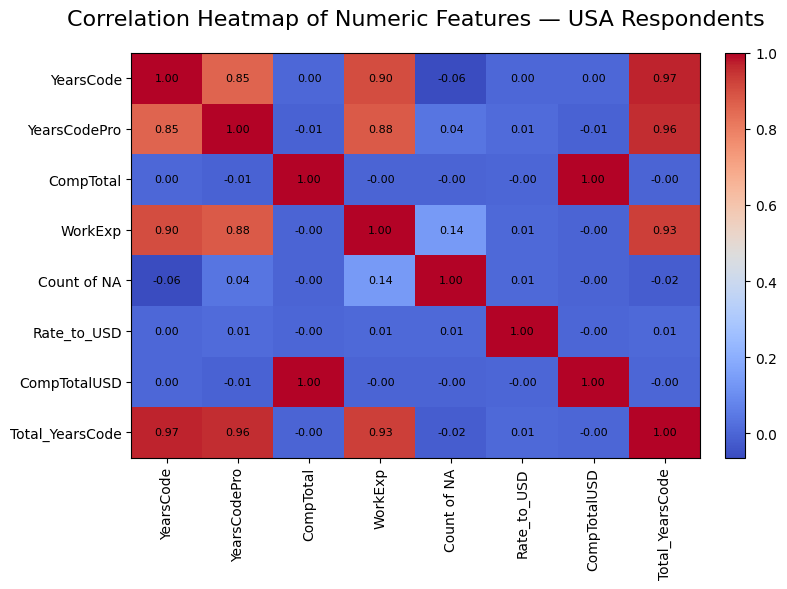

In [ ]:
# Select only numeric columns
numeric_df = df_stack_overflow_filtered_usa.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap with a bigger figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)   # <-- larger size and higher DPI
cax = ax.imshow(corr, interpolation='nearest', cmap='coolwarm', aspect='auto')
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Set ticks and labels
labels = corr.columns
ticks = np.arange(len(labels))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)

# Annotate each cell with the correlation value
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}",
                ha='center', va='center', fontsize=8)

ax.set_title('Correlation Heatmap of Numeric Features — USA Respondents', pad=20, fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Save the cleaned dataset to CSV
df_stack_overflow_filtered_usa.to_csv('stack_overflow_cleaned.csv', index=False)